In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3766,ham,Was gr8 to see that message. So when r u leavi...,NaN,NaN,NaN
4873,spam,lyricalladie(21/F) is inviting you to be her f...,NaN,NaN,NaN
344,ham,My sister cleared two round in birla soft yest...,NaN,NaN,NaN
1966,ham,2 laptop... I noe infra but too slow lar... I ...,NaN,NaN,NaN
1807,ham,"Aight, I'll ask a few of my roommates",NaN,NaN,NaN


In [4]:
df.shape

(5570, 5)

In [5]:
# data cleaning : nan values
# EDA
# Text preprocessing
# Model Building 
# Evaluation
# Improvements
# Website
# Deploy on heroku

## 1, Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5570 non-null   object
 1   v2          5570 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [7]:
# drop last three colms
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
1781,ham,No dear i do have free messages without any re...
4127,ham,And by when you're done I mean now
3507,ham,I just saw ron burgundy captaining a party boa...
4018,ham,We have to pick rayan macleran there.
4010,ham,Ok.


In [9]:
# renaming cols 
df.rename(columns ={'v1': 'target', 'v2':'text'}, inplace = True)

In [10]:
df.sample(5)

,target,text
4972,ham,Yar... I tot u knew dis would happen long ago ...
2095,ham,Are you the cutest girl in the world or what
1545,ham,Bishan lar nearer... No need buy so early cos ...
3007,ham,Imagine Life WITHOUT ME... see.. How fast u ar...
3753,ham,Yes:)here tv is always available in work place..


In [11]:
# also here is ham or spam so we want the numbers for the back of sack
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
4770,0,Ok then u tell me wat time u coming later lor.
4540,0,I've been trying to reach him without success
4582,1,U have a Secret Admirer who is looking 2 make ...
2656,0,Not yet chikku..wat abt u?
5009,0,U attend ur driving lesson how many times a wk...


In [13]:
# missing values check
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

404

In [15]:
# remove duplicate
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [16]:
df.shape

(5166, 2)

## 2. EDA - Exploratory Data Analysis

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4514
1     652
Name: target, dtype: int64

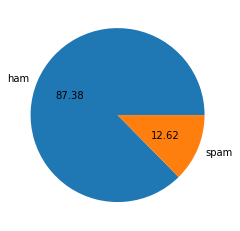

In [19]:
# to understand in visual
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels= ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [20]:
# data is imbalance ** 
import nltk # natural language tool kit library

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Smit
[nltk_data]     Raval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_char'] = df['text'].apply(len)

In [23]:
# fetch no. of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_char', 'num_words', 'num_sentences']].describe() 

,num_char,num_words,num_sentences
count,5166.000000,5166.000000,5166.000000
mean,78.783004,18.443670,1.948316
std,58.106998,13.327763,1.363414
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# ham messages
df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe() 

,num_char,num_words,num_sentences
count,4514.000000,4514.000000,4514.000000
mean,70.366859,17.111210,1.799734
std,56.334627,13.495255,1.278169
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# spam messages
df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe() 

,num_char,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.050613,27.668712,2.976994
std,29.937604,7.015283,1.486578
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

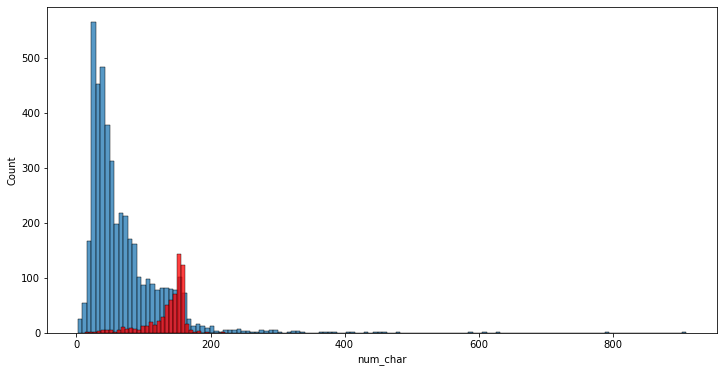

In [29]:
# histogram
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

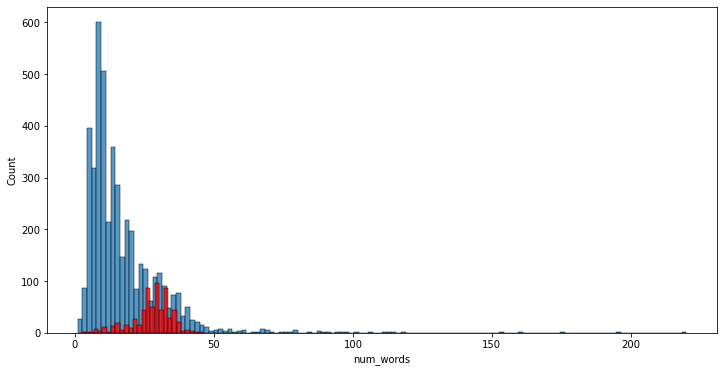

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

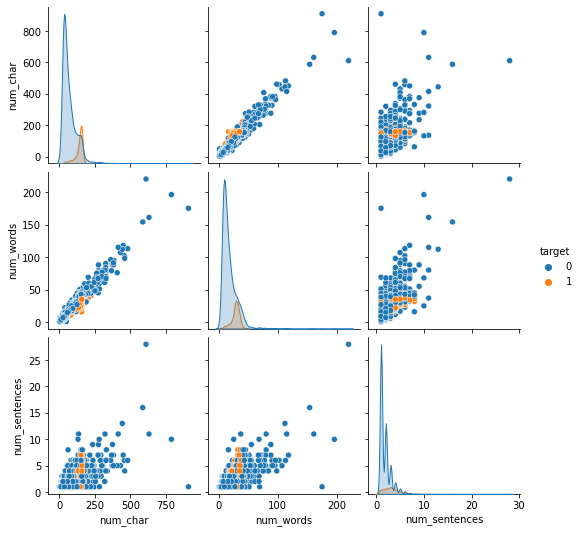

In [31]:
#reletionship between this three cols
sns.pairplot(df,hue = 'target')

<AxesSubplot:>

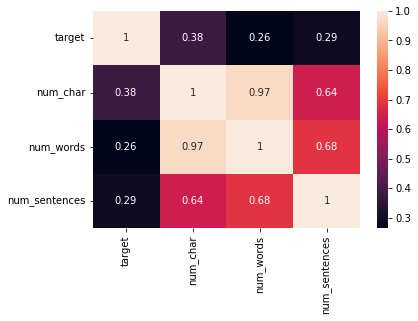

In [32]:
sns.heatmap(df.corr(),annot = True)

## 3. Data Processing
- Lower case
- Tokenatization
- Removing special characters
- Removing stop words and puntuation
- Stemming ex dance dancing dancer - dance

In [33]:
def transform_text(text):
    text = text.lower() # lower case transformation
    text = nltk.word_tokenize(text) # using nltk we can tokenize each word in a list
    
    y = [] # remove spcial character
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()
    
    for i in text: # rm stop words and punctuation marks
        if i  not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [34]:
from nltk.stem.porter import PorterStemmer # Stemming
ps = PorterStemmer()
ps.stem('loving')

'love'

In [35]:
nltk.download('stopwords')
import nltk
import string
from nltk.corpus import stopwords

transform_text(df['text'][10]) # how are you is stopwords

[nltk_data] Downloading package stopwords to C:\Users\Smit
[nltk_data]     Raval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
df['transformed_text'] = df['text'].apply(transform_text) 

In [37]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
# create word cloud : words use in spam will be shown in big picture
# ! pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

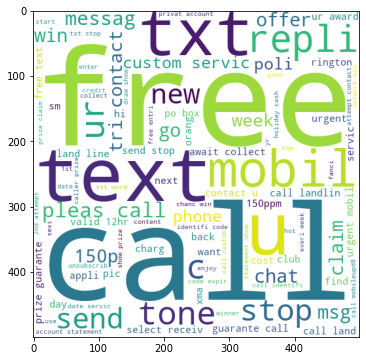

In [39]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (12,6))

plt.imshow(spam_wc)

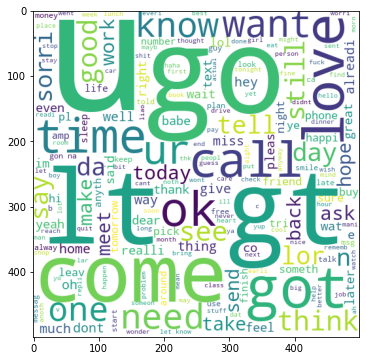

In [40]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (12,6))

plt.imshow(spam_wc)

In [41]:
# get top 30 words in ham and spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

10107

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


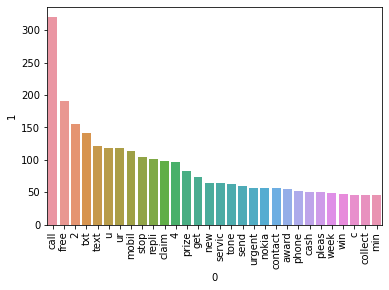

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


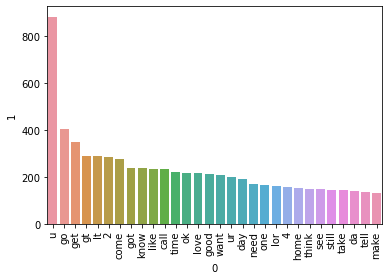

In [43]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Buiding

In [44]:
# numerical input chahiye hota hai
# text to vector
# naive based
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [45]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
X.shape

(5166, 6707)

In [47]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred)) # go for it.

0.8771760154738878
[[796  99]
 [ 28 111]]
0.5285714285714286


In [52]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9564796905222437
[[895   0]
 [ 45  94]]
1.0


In [53]:
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9738878143133463
[[892   3]
 [ 24 115]]
0.9745762711864406


In [54]:
# tfidf -> mnb

In [55]:
# all classification model

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
#     'BgC': bc, 
    'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.965183752417795, 0.9557522123893806)

In [60]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.965183752417795
Precision -  0.9557522123893806
For  KN
Accuracy -  0.8955512572533849
Precision -  1.0
For  NB
Accuracy -  0.9564796905222437
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8829787234042553
For  LR
Accuracy -  0.9448742746615088
Precision -  0.9183673469387755
For  RF
Accuracy -  0.9613152804642167
Precision -  1.0
For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.9528301886792453
For  ETC
Accuracy -  0.9680851063829787
Precision -  0.9907407407407407


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.895551,1.000000
2,NB,0.956480,1.000000
5,RF,0.961315,1.000000
7,ETC,0.968085,0.990741
0,SVC,0.965184,0.955752
6,AdaBoost,0.958414,0.952830
4,LR,0.944874,0.918367
3,DT,0.935203,0.882979


In [62]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.895551
1,NB,Accuracy,0.956480
2,RF,Accuracy,0.961315
3,ETC,Accuracy,0.968085
4,SVC,Accuracy,0.965184
5,AdaBoost,Accuracy,0.958414
6,LR,Accuracy,0.944874
7,DT,Accuracy,0.935203
8,KN,Precision,1.000000
9,NB,Precision,1.000000


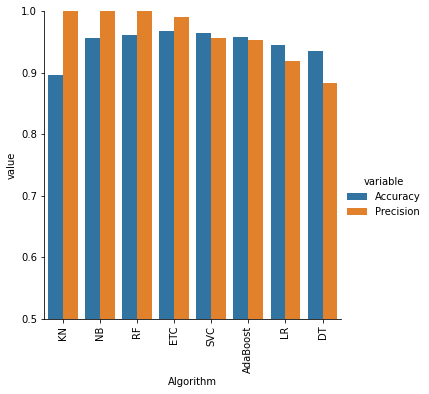

In [63]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))